In [20]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

#Enable Latex
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [2]:
def kernel_machine(x, X, alpha, k):
    '''
    :param x: (D) new observation
    :param X:  (N x D) training data
    :param alpha: (N) weights
    :param k: kernel function k(x,x)
    :return: +/- 1 binary decision
    '''
    return int(np.sign(np.sum(alpha * np.apply_along_axis(lambda y: k(y, x), 1, X))))

In [3]:
def k_polynomial(x, xp, d):
    return (np.dot(x, xp)+1)**d


def k_gaussian(x, xp, sigma):
    return np.exp(-np.linalg.norm(x-xp)**2/(2*(sigma**2)))


def k_sigmoid(x, xp, kappa, Theta):
    return np.tanh(kappa * np.dot(x, xp) + Theta)

In [4]:
def train_kernalized(k, X, Y):
    alpha = np.zeros(N)
    for j in range(0, 2):
        for i in range(0, N):
            if Y[i] * kernel_machine(X[i], X, alpha, k) < 0.00001:
                alpha[i] += Y[i]
    return alpha

In [5]:
N = 400 # number of samples
pts = np.random.rand(N, 2)*3-1.5 # random points in x,y in [-1.5, 1.5]
labels = pts[:, 0]**2 + pts[:, 1]**2 < 1 # decision boundary
X = pts
Y = labels*2-1

In [6]:
k = lambda x, xp: np.dot(x, xp)
alpha = train_kernalized(k, X, Y)
predicted_inner = np.array((1 + np.array([kernel_machine(x, X, alpha, k) for x in pts], dtype=np.int)) // 2,
                                dtype=np.bool)

k = lambda x, xp: k_polynomial(x, xp, 2.0)
alpha = train_kernalized(k, X, Y)
predicted_poly = np.array((1 + np.array([kernel_machine(x, X, alpha, k) for x in pts], dtype=np.int)) // 2,
                                dtype=np.bool)

k = lambda x, xp: k_gaussian(x, xp, .2)
alpha = train_kernalized(k, X, Y)
predicted_gaus = np.array((1 + np.array([kernel_machine(x, X, alpha, k) for x in pts], dtype=np.int)) // 2,
                                dtype=np.bool)

<IPython.core.display.Javascript object>


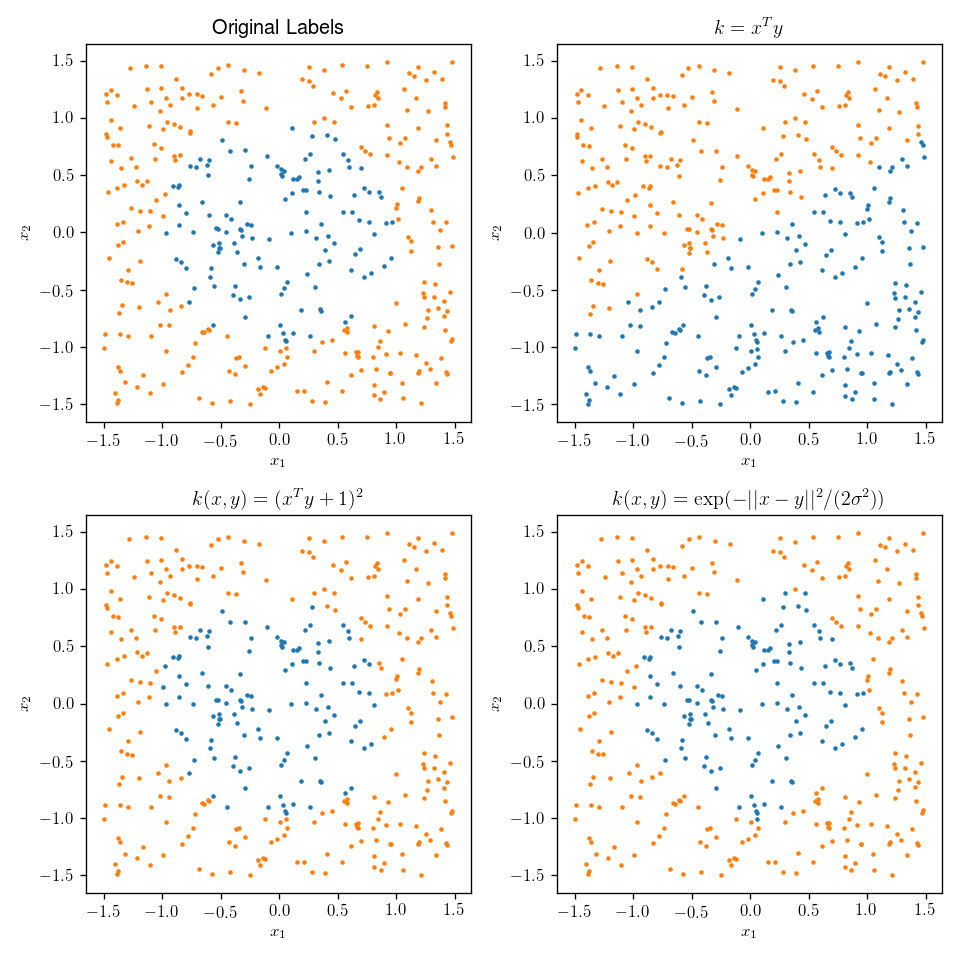

In [42]:
sz = 3
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.scatter(pts[labels,0], pts[labels, 1], s=sz)
plt.scatter(pts[~labels,0], pts[~labels, 1], s=sz)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Original Labels')

plt.subplot(2,2,2)
plt.scatter(pts[predicted_inner,0], pts[predicted_inner, 1], s=sz)
plt.scatter(pts[~predicted_inner,0], pts[~predicted_inner, 1], s=sz)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$k = x^T y $')

plt.subplot(2,2,3)
plt.scatter(pts[predicted_poly,0], pts[predicted_poly, 1], s=sz)
plt.scatter(pts[~predicted_poly,0], pts[~predicted_poly, 1], s=sz)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$k(x, y) = ( x^T y + 1 )^2$')

plt.subplot(2,2,4)
plt.scatter(pts[predicted_gaus,0], pts[predicted_gaus, 1], s=sz)
plt.scatter(pts[~predicted_gaus,0], pts[~predicted_gaus, 1], s=sz)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$k(x, y) = \exp ( {-||x - y||^2 / (2 \sigma^2)} )$')
plt.tight_layout()

plt.show()
